# Train/Test

Waiting for new data before evaluating our model would be a waste of time. We can emulate unseen data by splitting our data into train and test sets:

- Use the train set for fitting our model.
- Use the test set for evaluating our model's performance

Usually test sizes are 10-30% of the initial data, but it depends from the size of the dataset:

- Large datasets may require a smaller percentage (e.g., 10-20%).
- Smaller datasets may need a larger test set to ensure that it is representative (e.g., 30-40%).

Simple ML:

1. Use train_test_split from sklearn for splitting the data:
   - X_train: features used for training the model.
   - X_test: features used for testing the model's performance.
   - y_train: target for the train.
   - y_test: target for the test.

2. Fit a model to the train set.
3. Check model's performance on train and test sets.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'temp (x)': [5, 8, 10, 12, 20, 23, 33, 35],
    'sales (y)': [200, 235, 210, 240, 420, 435, 560, 620]})

X = df[['temp (x)']].values  # Feature
y = df['sales (y)'].values    # Target

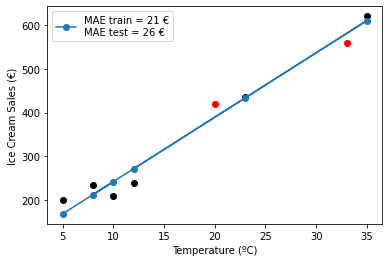

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Using 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Fit LR to train data (search for the optimal line based on MSE)
lr = LinearRegression().fit(X_train, y_train)

# Predicted values on the test set
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Calculate train and test MAE
mae_train = mean_absolute_error(y_train, y_pred_train).round(0).astype(int)
mae_test = mean_absolute_error(y_test, y_pred_test).round(0).astype(int)

# Predictions
plt.scatter(X_train, y_train, color='black')
plt.scatter(X_test, y_test, color='r')
plt.plot(X_train, y_pred_train, marker='o', label=f"MAE train = {mae_train} €\nMAE test = {mae_test} €")
plt.xlabel('Temperature (ºC)')
plt.ylabel('Ice Cream Sales (€)')
plt.legend()
plt.show()

